## Яндекс.Метрики

Настало время последнего мини-проекта в блоке Python! В нём вы узнаете, как ведут себя пользователи на сайте Яндекс.Метрики

Так как мы работаем с демо данными Яндекс.Метрики, нам позволено видеть данные только за последнюю неделю. Это требует обновления заданий и ответов на них каждую неделю, что не очень удобно и вам, и нам. Поэтому для удобства проверки мы решили немного модифицировать степы: теперь для того, чтобы ответить на вопросы, вам необходимо поработать с уже выгруженными датасетами из Яндекс.Метрики

### Задание 1

Для начала, давайте посмотрим на распределение посещений сайта по дням. Постройте график с распределением количества посещений от ботов и обычных пользователей сайта Яндекс.Метрика

Выбрать верные утверждения:
* Наименьшее число посещений пользователей-людей наблюдается 15 июня
* Наибольшая разница между числом посещений людьми и ботами наблюдается 16 июня
* 15 июня сайт посетило наибольшее число ботов
* 15 июня ботов было примерно в два раза больше, чем 16 июня
* 15 июня сайт посетило наименьшее число ботов
* Наименьшее число посещений наблюдается 17 июня только среди пользователей
* 17 июня сайт посетило наибольшее число ботов, по сравнению с 15 и 16 июня
* 17 июня ботов было примерно в два раза меньше, чем 15 июня

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
df_1 = pd.read_csv('step_1_lesson_7.csv')
df_1.head()

,date,user_type,visits
0,2020-06-15,People,417.0
1,2020-06-15,Robots,177.0
2,2020-06-16,People,472.0
3,2020-06-16,Robots,91.0
4,2020-06-17,People,475.0


<AxesSubplot:xlabel='date', ylabel='visits'>

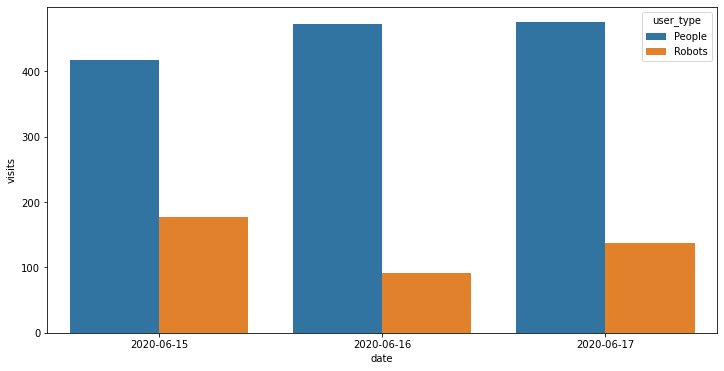

In [42]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=df_1, x='date', y='visits', hue='user_type', ax=ax)

* Наименьшее число посещений пользователей-людей наблюдается 15 июня
* Наибольшая разница между числом посещений людьми и ботами наблюдается 16 июня
* 15 июня сайт посетило наибольшее число ботов
* 15 июня ботов было примерно в два раза больше, чем 16 июня

### Задание 2

Определите процент посещений сайта Яндекс.Метрики с бразузера Google Chrome

*Ответ округлите до целого*

In [43]:
df_2 = pd.read_csv('step_2_lesson_7.csv')
df_2.head()

,date,browser,visits
0,2020-06-15,Google Chrome,354.0
1,2020-06-15,Firefox,58.0
2,2020-06-15,Yandex Browser,54.0
3,2020-06-15,Safari,41.0
4,2020-06-15,Chrome Mobile,31.0


In [44]:
df_2.loc[df_2['browser'] == 'Google Chrome']['visits'].iloc[0]

354.0

In [45]:
percent_visits = df_2.loc[df_2['browser'] == 'Google Chrome']['visits'].iloc[0] / df_2['visits'].sum() * 100
round(percent_visits,0)

60.0

Ответ: 60

### Задание 3

Давайте выясним, с какого браузера приходит больше всего ботов. Посмотрите на данные и определите, у какого браузера самая большая доля посещений сайта ботами от общего числа посещений в этом браузере?

*В качестве ответа укажите название браузера*

In [46]:
df_3 = pd.read_csv('step_3_lesson_7.csv')
df_3.head()

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0


In [47]:
df_3['date'].unique()

array(['2020-06-15'], dtype=object)

In [48]:
visits_ut_b = df_3.groupby(['browser', 'user_type'])['visits'].sum()
visits_ut_b.head()

browser          user_type
Android Browser  People        1.0
Chrome Mobile    People       31.0
Chromium         People        1.0
                 Robots        1.0
CocCoc           People        1.0
Name: visits, dtype: float64

In [49]:
visits_b = df_3.groupby(['browser'])['visits'].sum()
visits_b.head()

browser
Android Browser     1.0
Chrome Mobile      31.0
Chromium            2.0
CocCoc              1.0
Edge                5.0
Name: visits, dtype: float64

In [50]:
shares = visits_ut_b / visits_b
shares.loc[:, 'Robots'].nlargest(1)

browser
UCWEB    1.0
Name: visits, dtype: float64

Ответ: UCWEB

### Задание 4

Выгрузите данные, содержащие информацию о дне, типе пользователя, браузере. Создайте колонку с метрикой доли заходов на сайт для каждого из этих разрезов

В ответе укажите процент открытий сайта настоящими пользователями Safari (не ботами) с точностью до 1 знака после точки

*Обратите внимание, здесь вам нужно найти долю заходов конкретных типов пользователей с конкретного браузера от вообще всех-всех заходов на сайт за этот день.*

In [51]:
df_4 = pd.read_csv('step_4_lesson_7.csv')
df_4.head()

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0


In [52]:
df_4['all_visits'] = df_4['visits'].sum()
df_4['perc'] = df_4['visits'] / df_4['all_visits'] * 100

df_4.query("user_type == 'People' & browser == 'Safari'")

,date,browser,user_type,visits,all_visits,perc
7,2020-06-15,Safari,People,19.0,594.0,3.198653


Ответ: 3.2